> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and profile the data: data types, distributions, identify missing or unusual data such as outliers
- Deal with outliers
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

This week we will use data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018. Retrieved from https://github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Libraries and Data

### Instructions:
- Import the `pandas`, `matplotlib` and `seaborn` libraries.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# we can use a function in pandas called read_csv() to read in csv files.
# Similarly there are other functions such as  read_excel(), read_json(), read_html() etc
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [27]:
df.head(10)

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,1970-01-01 00:00:00.020050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,1970-01-01 00:00:00.020050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,1970-01-01 00:00:00.020041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,1970-01-01 00:00:00.020120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,1970-01-01 00:00:00.020041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
5,pre2013_152345,1970-01-01 00:00:00.020060411,2006,alameda,alameda,alameda,825,1.0,NaN,NaN,0,NaN,NaN,NaN,$825 / 1br - Bayview Apartments,NaN,NaN
6,pre2013_27543,1970-01-01 00:00:00.020071025,2007,alameda,alameda,alameda,1500,1.0,1.0,NaN,0,NaN,NaN,NaN,$1500 / 1br - 1 Bath-3 Room Apartment - OPEN S...,NaN,NaN
7,6379096957,1970-01-01 00:00:00.020171108,2017,alameda,alameda,alameda,2925,3.0,NaN,NaN,0,NaN,NaN,NaN,CUT DOWN ON THOSE MOVE-IN COSTS WITH $500 OFF!!!,NaN,NaN
9,pre2013_152262,1970-01-01 00:00:00.020060411,2006,alameda,alameda,alameda,1395,2.0,NaN,NaN,0,NaN,NaN,NaN,"$1395 / 2br - Huge Units! Lagoon Complex, Free...",NaN,NaN
10,pre2013_3302,1970-01-01 00:00:00.020061208,2006,alameda,alameda,alameda,1555,2.0,NaN,NaN,0,NaN,NaN,NaN,$1555 / 2br - Brand New! Avail. for immediate ...,NaN,NaN


### 🔧 Try It Yourself - Part 1

1. Add one line of code to print the number of rows and columns. To get the size of the table, use the .shape attribute of the Dataframe.

In [21]:
# Add code here 🔧
df.shape

(197021, 17)

## Part 2: Inspecting/Profiling Data, Checking Datatypes & Identifying Outliers

### Instructions:
- Identify whether variables have missing values.
- Check data types (e.g., dates, numeric columns). These are inferred. Do they look appropriate?
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`. Outliers are extreme or unusally low or high values compared to most others.



In [6]:
# Check for missing values - get a count for each column
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [23]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()


,price,beds,baths,sqft
count,197021.000000,190793.000000,41972.000000,63588.000000
mean,2067.667848,1.876112,1.663943,1174.754576
std,1092.775166,1.058409,0.665596,5033.363160
min,650.000000,0.000000,1.000000,80.000000
25%,1299.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2500.000000,2.000000,2.000000,1340.000000
max,7500.000000,12.000000,6.500000,900000.000000


In [24]:
df.describe()

,date,year,price,beds,baths,sqft,room_in_apt,lat,lon
count,197021,197021.000000,197021.000000,190793.000000,41972.000000,63588.000000,197021.000000,7424.000000,4196.000000
mean,1970-01-01 00:00:00.020095619,2009.498013,2067.667848,1.876112,1.663943,1174.754576,0.001289,37.664866,-122.207930
min,1970-01-01 00:00:00.020000902,2000.000000,650.000000,0.000000,1.000000,80.000000,0.000000,33.570100,-123.196500
25%,1970-01-01 00:00:00.020050225,2005.000000,1299.000000,1.000000,1.000000,750.000000,0.000000,37.398839,-122.422373
50%,1970-01-01 00:00:00.020110924,2011.000000,1800.000000,2.000000,2.000000,1000.000000,0.000000,37.755261,-122.260880
75%,1970-01-01 00:00:00.020120805,2012.000000,2500.000000,2.000000,2.000000,1340.000000,0.000000,37.797323,-121.994448
max,1970-01-01 00:00:00.020180717,2018.000000,7500.000000,12.000000,6.500000,900000.000000,1.000000,40.434945,-74.198019
std,NaN,4.478156,1092.775166,1.058409,0.665596,5033.363160,0.035882,0.347246,0.783762


In [8]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


Data types are inferred.
- Numeric valus are either `int` (discrete, whole numbers with no limit) or `float` (continuous decimals with no limit). 64 is the default number of bits used to store the int or float.
- String/text is stored as `object`.
- Note that the inferred datatypes are not always ideal. For instance categorical is not used automatically. We have to set that. `categorical` is best when there are only a limited number of allowed values in the data. This can be numerical variables (0 or 1) or text variables with only some values to choose from (nhood, city, county)
- The date column is set as int, i.e. date is treated as integer. We will need to change this to `datetime` manually.


In [29]:
#change the following object and int variables to categorical
df['nhood']=df['nhood'].astype('category')
df['city']=df['city'].astype('category')
df['county']=df['county'].astype('category')

#change the date column to datetime
df['date']=pd.to_datetime(df['date'], errors = 'coerce')


/tmp/ipython-input-3500207685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nhood']=df['nhood'].astype('category')
/tmp/ipython-input-3500207685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']=df['city'].astype('category')
/tmp/ipython-input-3500207685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [30]:
#check dtypes again to verify changes
df.dtypes

,0
post_id,object
date,datetime64[ns]
year,int64
nhood,category
city,category
county,category
price,int64
beds,float64
baths,float64
sqft,float64


### Outlier analysis
To see whether a variable contains outlier (points that are very different in value from the rest), we can create a **boxplot** of the variable.

In a boxplot, the box covers the interquartile range (IQR) from 25-75 percentile of the data, and the whiskers (T lines) extend to a certain range (1.5 times the IQR) from the box. Any data points that fall outside of this whisker range are considered outliers and are plotted individually as points.

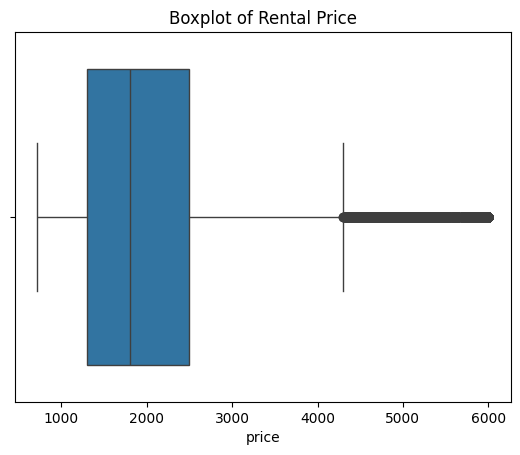

In [37]:
# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [25]:
# Remove price outliers (keep 1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [31]:
#check the shape to see how many rows were removed/lost when we dropped outliers in price
df.shape

(193197, 17)

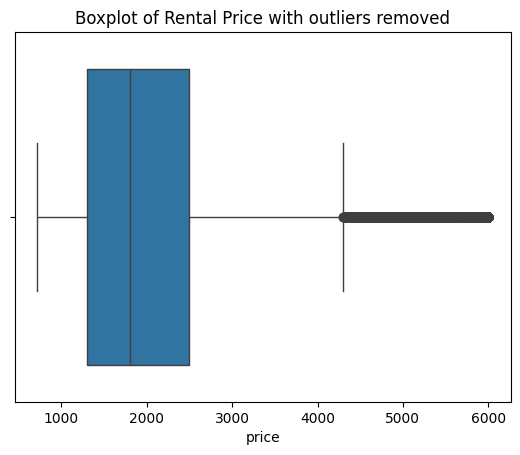

In [32]:
# the plot should have fewer outliers now - see for yourself
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price with outliers removed")
plt.show()

### 🔧 Try It Yourself – Part 2

1. Change the datatype of room_in_apt to categorical and print dtypes to verify that it has been changed.

2. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

3. What patterns or issues do you see with square footage values? Is there anything unusual? You dont need to remove the outliers here - leave them.


In [34]:
# Add code here 🔧
df['room_in_apt']=df['room_in_apt'].astype('category')



/tmp/ipython-input-4889018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_in_apt']=df['room_in_apt'].astype('category')


In [35]:
df.dtypes

,0
post_id,object
date,datetime64[ns]
year,int64
nhood,category
city,category
county,category
price,int64
beds,float64
baths,float64
sqft,float64


In [40]:
# Add code here
df.describe()

,date,year,price,beds,baths,sqft,lat,lon
count,193197,193197.000000,193197.000000,187229.000000,41238.000000,62473.000000,7243.000000,4097.000000
mean,1970-01-01 00:00:00.020095509,2009.486954,2036.269854,1.872552,1.656021,1160.536088,37.663884,-122.204713
min,1970-01-01 00:00:00.020000902,2000.000000,720.000000,0.000000,1.000000,80.000000,33.570100,-123.196500
25%,1970-01-01 00:00:00.020050224,2005.000000,1300.000000,1.000000,1.000000,750.000000,37.397796,-122.421683
50%,1970-01-01 00:00:00.020110830,2011.000000,1800.000000,2.000000,2.000000,1000.000000,37.753769,-122.256261
75%,1970-01-01 00:00:00.020120729,2012.000000,2500.000000,2.000000,2.000000,1310.000000,37.797400,-121.990300
max,1970-01-01 00:00:00.020180717,2018.000000,6000.000000,12.000000,6.000000,900000.000000,40.434945,-74.198019
std,NaN,4.476562,989.992725,1.045912,0.657364,5074.978266,0.349472,0.792390


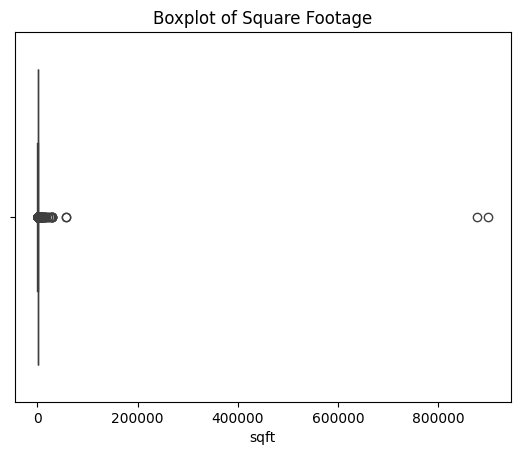

In [42]:
sns.boxplot(x=df['sqft'])
plt.title("Boxplot of Square Footage")
plt.show()

🔧 Add comment here:

The pattern of most apartments being around 750-1300 sqft is normal for apartments in SF.

There are two outliers seen in the box plot and the describe chart that are way too big to be apartments. SQFT of 900000ft is too much for an apartment. Along with an 80 sqft aparment, which is out of the orindary, but still plausable.


## Part 3: Basic Exploration

### Instructions:

- Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [17]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-2269547214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)


,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [18]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [43]:
# Add code here 🔧
df.groupby('year')['price'].mean()

,price
year,
2000,1601.578947
2001,2005.586351
2002,1687.274368
2003,1578.110312
2004,1639.973280
2005,1514.348082
2006,1751.406450
2007,1996.028583
2008,1964.345241


In [45]:
df['room_in_apt'].value_counts().head(10)

,count
room_in_apt,
0,192959
1,238


🔧 Add comment here:

For the rental pricing per month, it stayed pretty stable with a gradual increase until the 2009 housing market crash, which put prices lower than usual.

But overtime, after 2010, prices increased at a faster pace and after 8 years(2010-2018) rental prices rose by around one thousand dollars.

There are many more full apartment rentals compared to a much smaller amount of rentals that only have/are looking to fill one room in the apartment.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [46]:
!jupyter nbconvert --to html "SOLN_lab_04_data_understanding.ipynb"

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 4, in <module>
    from nbconvert.nbconvertapp import main
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 193, in <module>
    class NbConvertApp(JupyterApp):
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 340, in NbConvertApp
    {get_export_names()}
     ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/base.py", line 145, in get_export_names
    e = get_exporter(exporter_name)(config=config)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/base.py", line 104, in get_exporter
    exporters = entry_points(group="nbconvert.exporters")
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/importlib/metadata/__init__.py", line 913, in entry_points
    return EntryPoints(eps).select(**params)
           ^^^^^^^^^^^^^^^